In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/MyDrive/ColabNotebooks/NLP_Review_Analysis/pyTCTK/')
from pyTCTK import TextNet, WordNet

!pip install matplotlib
!pip install plotly

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()
from plotly.subplots import make_subplots
from pyTCTK import Tokenize
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

Output hidden; open in https://colab.research.google.com to view.

In [3]:
df_data = pd.read_csv(filepath_or_buffer="/content/gdrive/MyDrive/ColabNotebooks/NLP_Review_Analysis/amzn_customer_reviews_new.csv", sep=",")
df_data.head(3)

,Pseudo,Title,Review,Rating,Verified Purchase,Date,Score,Compound,Sentiment,New rating,New date,Country
0,Assault Kittens,really good option portability,impressive form factor really good balance siz...,4.5 out of 5 stars,Yes,"Reviewed in the United States on June 18, 2021","{'neg': 0.014, 'neu': 0.736, 'pos': 0.249, 'co...",0.9941,positive,4.5,2021-06-18,United States
1,Kenneth Cramer,excellent portable gaming,write review anyone fence purchasing since rea...,5.0 out of 5 stars,Yes,"Reviewed in the United States on July 7, 2021","{'neg': 0.016, 'neu': 0.88, 'pos': 0.104, 'com...",0.9921,positive,5.0,2021-07-07,United States
2,Assault Kittens,best inch world,sell macbook best decisions lifeif use macbook...,1.0 out of 5 stars,Yes,"Reviewed in the United States on June 18, 2021","{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.8779,positive,1.0,2021-06-18,United States


In [4]:
df_pos = df_data[df_data["Sentiment"] == "positive"]
df_neg = df_data[df_data["Sentiment"] == "negative"]
df_neu = df_data[df_data["Sentiment"] == "neutral"]

In [6]:
class_data = df_data.groupby("Sentiment").count()["Review"].reset_index().sort_values(by="Review",ascending=False)
percent_class = class_data["Review"]
labels = class_data["Sentiment"]

fig = px.pie(
    labels,
    values=percent_class,
    hole=0.4,
    names=labels, color=labels,
    title="Sentiment distribution",
    color_discrete_map={
        "positive": "#17C37B",
        "neutral": "#FACA0C",
        "negative":"#F92969"
    }
)

fig.update_traces(
    title_font=dict(
        size=25,
        family="Verdana",
        color="darkred"
    ),
    hoverinfo="label+percent",
    textinfo="percent",
    textfont_size=20
)

fig.show(renderer="colab")

In [7]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Positive", "Negative", "Neutral"))

fig.add_trace(
    go.Histogram(name="Positive", x=df_pos["New rating"], marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Histogram(name="Negative", x=df_neg["New rating"], marker=dict(color="#F92969")), row=1, col=2
)                     
fig.add_trace(
    go.Histogram(name="Neutral", x=df_neu["New rating"], marker=dict(color="#FACA0C")), row=1, col=3
)

fig.update_layout(title="Rating distribution by sentiment")

fig.show(renderer="colab")

In [8]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Positive", "Negative", "Neutral"))

fig.add_trace(
    go.Histogram(name="Positive", x=df_pos["New date"], marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Histogram(name="Negative", x=df_neg["New date"], marker=dict(color="#F92969")), row=1, col=2
)                     
fig.add_trace(
    go.Histogram(name="Neutral", x=df_neu["New date"], marker=dict(color="#FACA0C")), row=1, col=3
)                  

fig.update_layout(title="Date of review by sentiment")

fig.show(renderer="colab")

In [9]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Positive", "Negative", "Neutral"))

fig.add_trace(
    go.Histogram(name="Positive", x=df_pos["Country"], marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Histogram(name="Negative", x=df_neg["Country"], marker=dict(color="#F92969")), row=1, col=2
)                     
fig.add_trace(
    go.Histogram(name="Neutral", x=df_neu["Country"], marker=dict(color="#FACA0C")), row=1, col=3
) 

fig.update_layout(title="Customer's country by sentiment")

fig.show(renderer="colab")

In [10]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Positive", "Negative", "Neutral"))

fig.add_trace(
    go.Histogram(name="Positive", x=df_pos["Verified Purchase"], marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Histogram(name="Negative", x=df_neg["Verified Purchase"], marker=dict(color="#F92969")), row=1, col=2
)                     
fig.add_trace(
    go.Histogram(name="Neutral", x=df_neu["Verified Purchase"], marker=dict(color="#FACA0C")), row=1, col=3
) 

fig.update_layout(title="Verified purchase by sentiment")

fig.show(renderer="colab")

In [11]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Positive", "Negative", "Neutral"))

review_pos = df_data[df_data["Sentiment"] == "positive"]["Review"].str.len()
review_neg = df_data[df_data["Sentiment"] == "negative"]["Review"].str.len()
review_neu = df_data[df_data["Sentiment"] == "neutral"]["Review"].str.len()

fig.add_trace(
    go.Histogram(name="Positive", x=review_pos, marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Histogram(name="Negative", x=review_neg, marker=dict(color="#F92969")), row=1, col=2
)                     
fig.add_trace(
    go.Histogram(name="Neutral", x=review_neu, marker=dict(color="#FACA0C")), row=1, col=3
)  

fig.update_layout(title="Number of characters in a review")

fig.show(renderer="colab")

In [12]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Positive", "Negative", "Neutral"))

review_pos = df_data[df_data["Sentiment"] == "positive"]["Review"].str.split().map(lambda x: len(x))
review_neg = df_data[df_data["Sentiment"] == "negative"]["Review"].str.split().map(lambda x: len(x))
review_neu = df_data[df_data["Sentiment"] == "neutral"]["Review"].str.split().map(lambda x: len(x))

fig.add_trace(
    go.Histogram(name="Positive", x=review_pos, marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Histogram(name="Negative", x=review_neg, marker=dict(color="#F92969")), row=1, col=2
)                     
fig.add_trace(
    go.Histogram(name="Neutral", x=review_neu, marker=dict(color="#FACA0C")), row=1, col=3
)    

fig.update_layout(title="Number of words in a review")

fig.show(renderer="colab")

In [13]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Positive", "Negative", "Neutral"))

word_pos = df_data[df_data["Sentiment"] == "positive"]["Review"].str.split().apply(lambda x: [len(i) for i in x])
word_neg = df_data[df_data["Sentiment"] == "negative"]["Review"].str.split().apply(lambda x: [len(i) for i in x])
word_neu = df_data[df_data["Sentiment"] == "neutral"]["Review"].str.split().apply(lambda x: [len(i) for i in x])

fig.add_trace(
    go.Histogram(name="Positive", x=word_pos.map(lambda x: np.mean(x)), marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Histogram(name="Negative", x=word_neg.map(lambda x: np.mean(x)), marker=dict(color="#F92969")), row=1, col=2
)                     
fig.add_trace(
    go.Histogram(name="Neutral", x=word_neu.map(lambda x: np.mean(x)), marker=dict(color="#FACA0C")), row=1, col=3
)    

fig.update_layout(title="Average word length in each review")

fig.show(renderer="colab")

In [14]:
df = pd.DataFrame(columns=["Word", "Count"])

for dfs in [df_pos["Review"], df_neg["Review"], df_neu["Review"]]:
    list_reviews = []
    for review in dfs:
        sentence = review.split(" ")
        for word in sentence:
            list_reviews.append(word)
    counter = Counter(list_reviews)
    word = [w[0] for w in counter.most_common(15)]
    count = [w[1] for w in counter.most_common(15)]
    df = df.append(
            dict(
                zip(
                    df.columns,
                    [
                        word,
                        count
                    ]
                )
            ),
            ignore_index=True
        )

fig = make_subplots(rows=3, cols=1, subplot_titles=("Positive", "Negative", "Neutral"))

fig.add_trace(
    go.Bar(name="Positive", x=df["Word"][0], y=df["Count"][0], marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Bar(name="Negative", x=df["Word"][1], y=df["Count"][1], marker=dict(color="#F92969")), row=2, col=1
)                    
fig.add_trace(
    go.Bar(name="Neutral", x=df["Word"][2], y=df["Count"][2], marker=dict(color="#FACA0C")), row=3, col=1
)

fig.update_layout(title="Verified purchase by sentiment")

fig.show(renderer="colab")

In [ ]:
df = pd.DataFrame(columns=["Reviews"])

for dfs in [df_pos, df_neg, df_neu]:
    dfs = Tokenize(
        data=dfs,
        column="Review"
    ).word_tokenize()
    
    comment_words = ""
    for i in range(0, dfs["Review"].shape[0]): 
        comment_words += " ".join(dfs["Review"][i]) + " "
    
    df = df.append(
            dict(
                zip(
                    df.columns,
                    [
                        comment_words
                    ]
                )
            ),
            ignore_index=True
        )

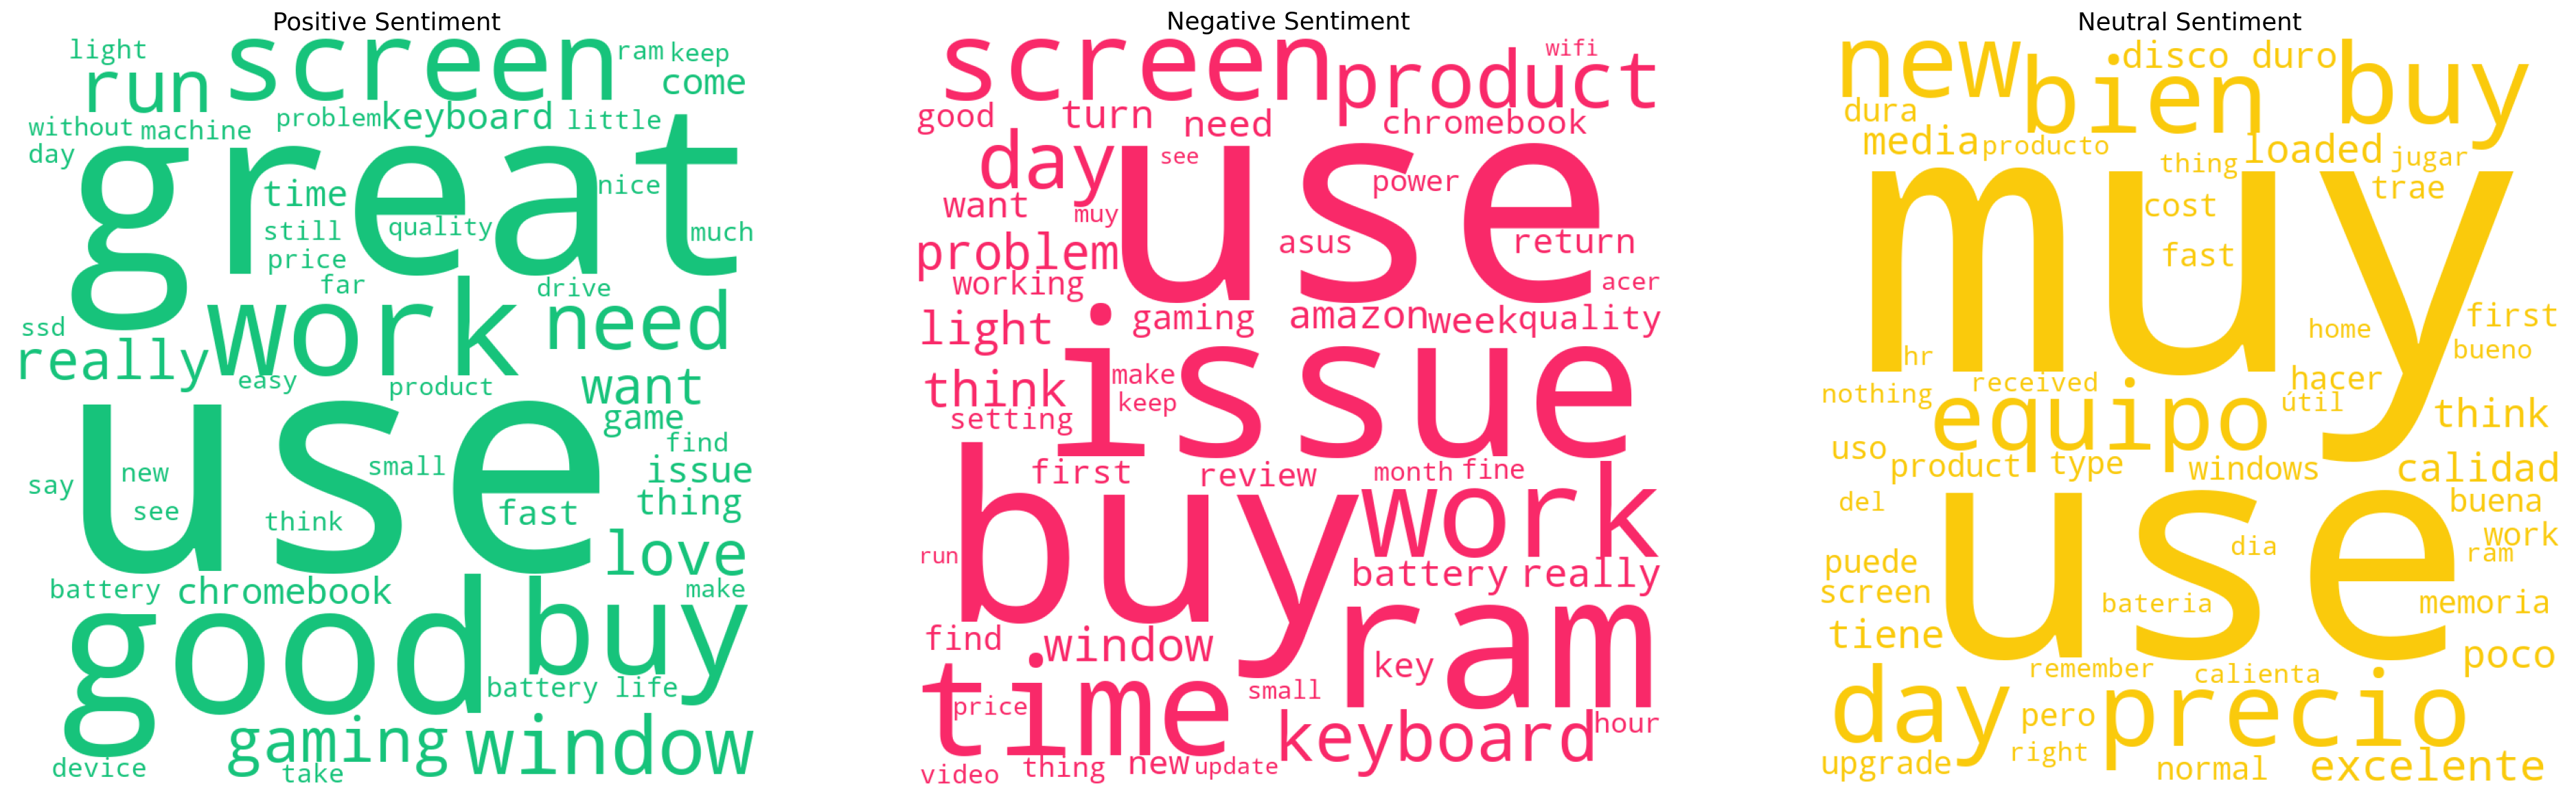

In [ ]:
list_colors = ["#17C37B", "#F92969", "#FACA0C"]
list_titles = ["Positive Sentiment", "Negative Sentiment", "Neutral Sentiment"]

fig, axes = plt.subplots(1, 3, figsize=(30, 20), sharey=True, dpi=160)

for i, ax in enumerate (axes.flatten()):
    wc = WordCloud(
        width=800,
        height=800,
        max_words=50,
        min_font_size=10,
        background_color="white",
        colormap="tab10",
        color_func=lambda *args, **kwargs: list_colors[i],
        stopwords=None,
        prefer_horizontal=1.0
    )
    fig.add_subplot(ax)
    wc.generate(df["Reviews"][i])
    plt.gca().imshow(wc)
    plt.gca().set_title(list_titles[i], fontdict=dict(size=16))
    plt.gca().axis("off")
    
plt.axis("off")
plt.subplots_adjust(hspace=0.6)
plt.show()